<h1> Importing Libraries</h1>

In [59]:
# Loading Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns


<h1> Reading the file </h1>

In [60]:
#Converted the Excel to CSV format for easy readibility.
Bank_Data=pd.read_csv("D:\Predictive Analytics\Module 3\Group Assignment\Bank_Personal_Loan_Modelling.csv")

In [61]:
Bank_Data
#type(Bank_Data)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [62]:
# Dimensions of the Data set 
Bank_Data.shape  

(5000, 14)

In [63]:
# Information about the data set 
Bank_Data.info()
# The data set has majorly values in the Integer data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<h1> Descriptive Analytics </h1>

In [64]:
#Statistical Modelling
Bank_Data.describe()
# We can see that experience is coming negative. We can try to remove the negative value so that it does not cause a left skew

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [65]:
# Total number of observations with negative values in their Experience column
negExp = Bank_Data.Experience < 0
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

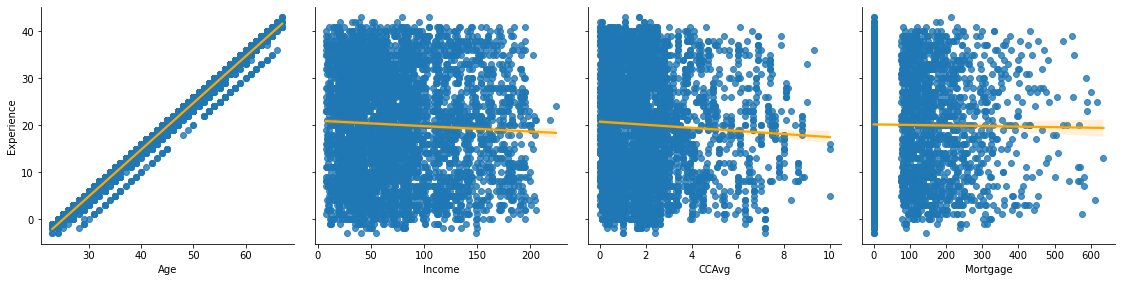

In [71]:
# Checking the Correlation of Experience with Age, Income, Mortgage and Credit Average 
quantitativeAttr = ['Age', 'Income', 'CCAvg', 'Mortgage']
# Plotting Pair Grid Graph with Regplot
grid = sns.PairGrid(data=Bank_Data, y_vars='Experience', x_vars=quantitativeAttr, height = 4)
grid.map(sns.regplot, line_kws={"color": "orange"});

# In the Graph we see that Age has a strong Correlation with Experience, hence we are not dropping Experience Column
#Income, Credit Average and Mortgage have a moderate relation ship with 

In [91]:
#Trying to Offset the Negative Experience Effects
           
      



Data_Pos_Exp = Bank_Data[Bank_Data['Experience'] > 0]          # Creating a +ve Data frame 
type(Data_Pos_Exp)
Data_Neg_Exp = Bank_Data[Bank_Data['Experience'] < 0]                #Creating a  -ve Data Frame
type(Data_Neg_Exp)
negative_experience_id_list = df_negative_experience['ID'].tolist()  # Creating a list of Id's with -ve values

for id in negative_experience_id_list:                                                   # Creating a for loop to go over the ID one by one
    age = Bank_Data.loc[np.where(Bank_Data['ID']==id)]['Age'].tolist()[0]                 # Retrieve the age from the ID having -ve Experience
    education = Bank_Data.loc[np.where(Bank_Data['ID']==id)]['Education'].tolist()[0]     #Retrieve the education from the ID having -ve Experience
    positive_experience_filtered = Data_Pos_Exp[(Data_Pos_Exp['Age'] == age) &               #Filter any +ve Age and Education from experience from the positive exp datatframe
                                                         (Data_Pos_Exp['Education'] == education)] 
    if positive_experience_filtered.empty:
        negative_experience_filtered = Data_Neg_Exp[(Data_Neg_Exp['Age'] == age) &             
                                                (Data_Neg_Exp['Education'] == education)]
        experience = round(negative_experience_filtered['Experience'].median())   #After filtering Calculate the Median Exp 
      
    else:
        experience = round(positive_experience_filtered['Experience'].median()) #Replace the -ve exp with the median exp value
        Bank_Data.loc[Bank_Data.ID == id, 'Experience'] = abs(experience)




In [92]:
Bank_Data[Bank_Data['Experience'] < 0]['Experience'].count()

0

In [94]:
Bank_Data.Experience.describe()
#The Min Experience Value comes as Zero and the Negative Value has been Dealt with

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<h1> Checking Null Values </h1>

In [40]:
#Checking for Null Values
Bank_Data.isnull().sum()      
# The data seems to be having no null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h1> Checking Duplicates </h1>

In [41]:
#Checking for duplicated data
Bank_Data.duplicated()
# The data does not seem to be having duplicated values

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [42]:
# Dropping the first column of the data set
Bank_Data.drop(['ID','ZIP Code'],axis=1,inplace=True)
# Removing Zip Code and Id since they are not relevant here

In [43]:
#Printing the data after the column Removal
Bank_Data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


<h1> Checking Outliers </h1>

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

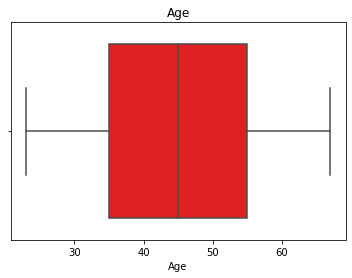

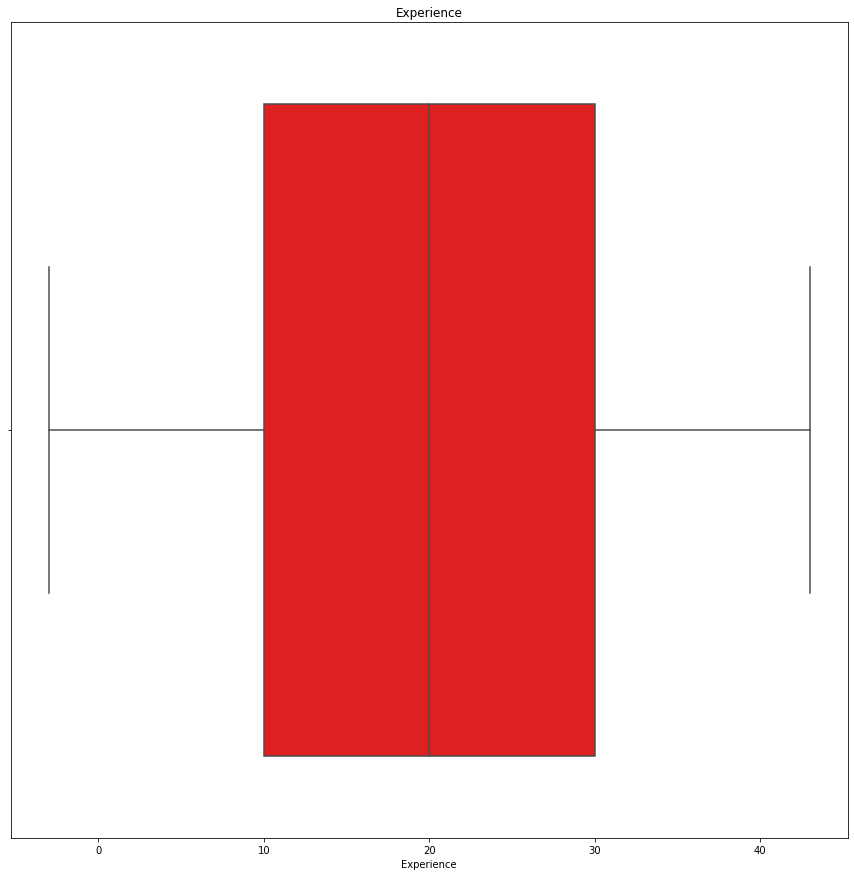

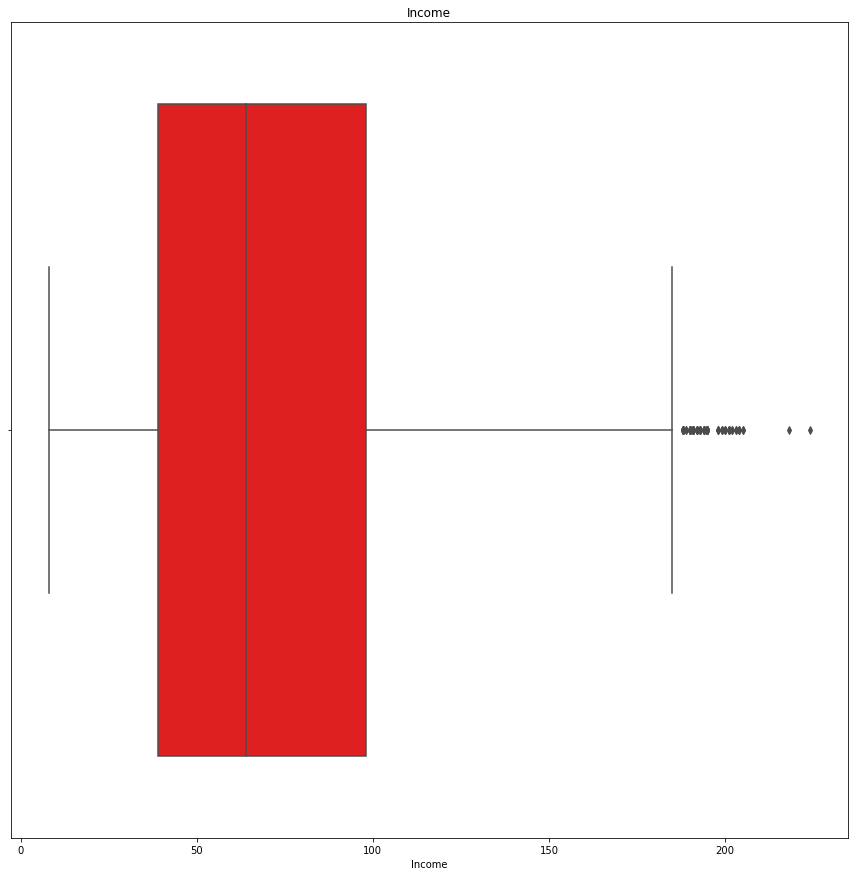

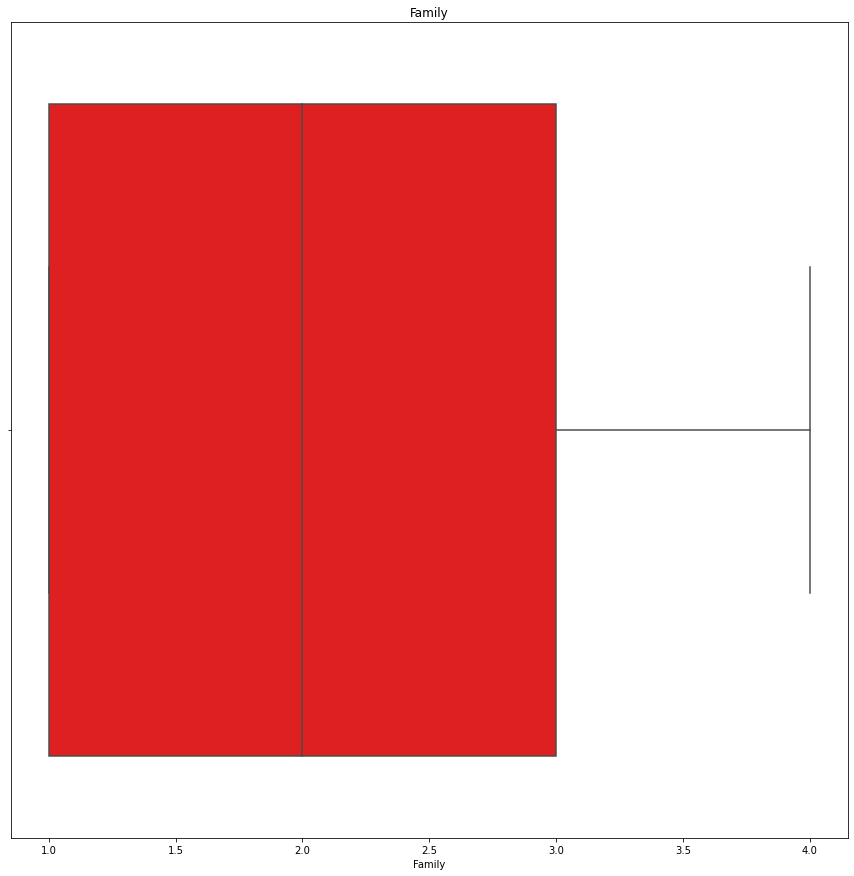

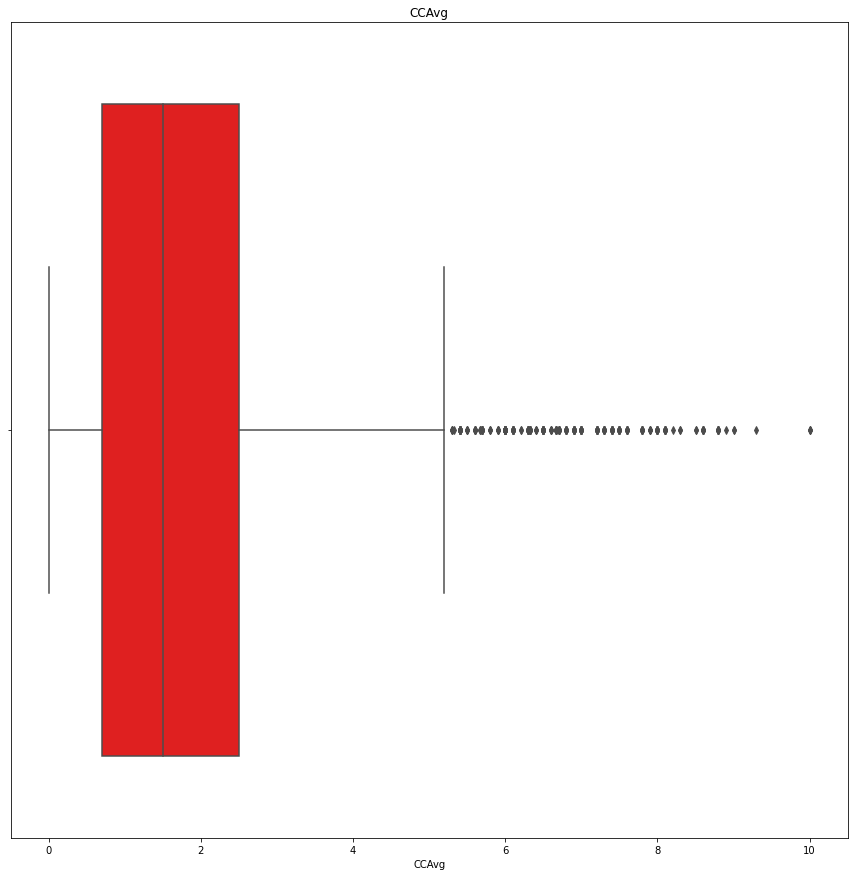

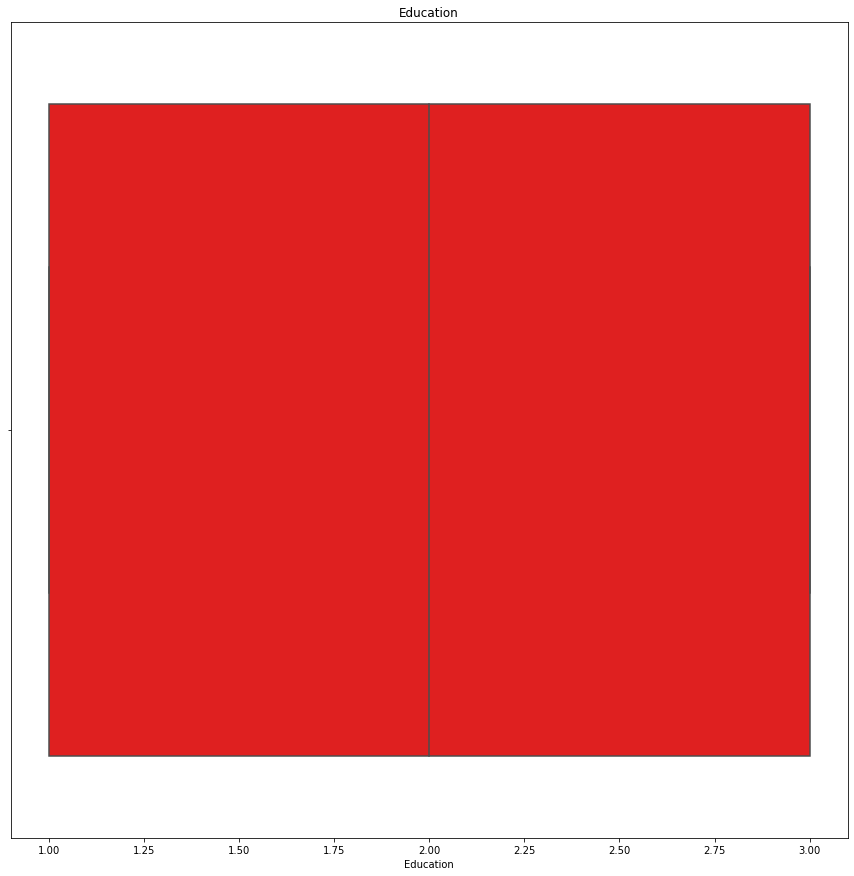

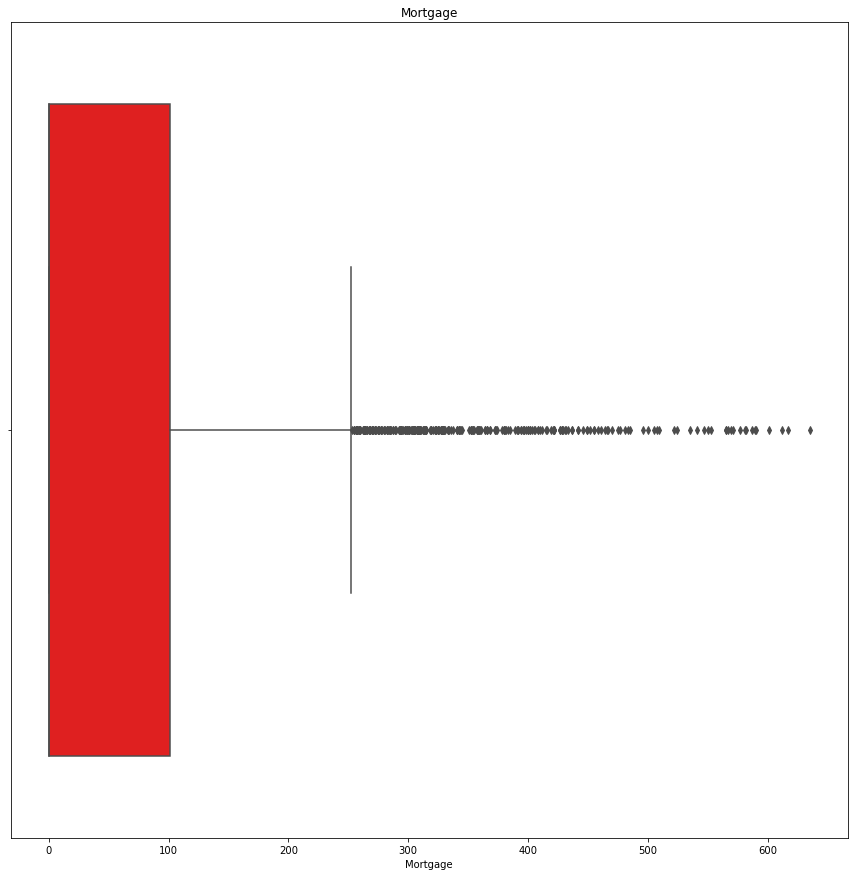

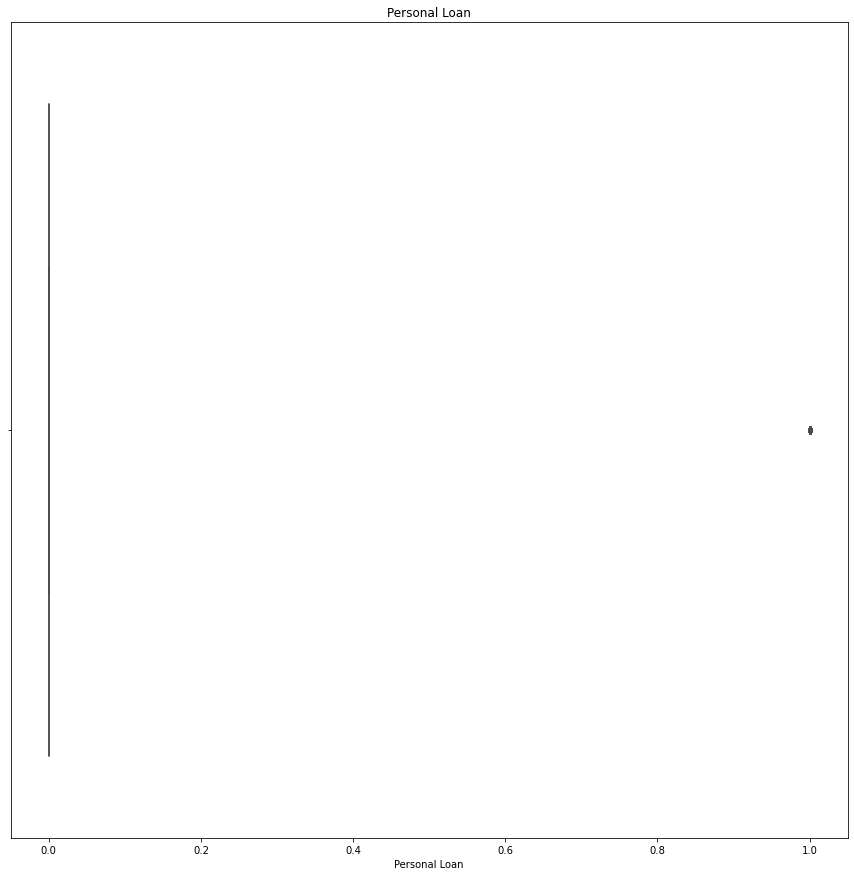

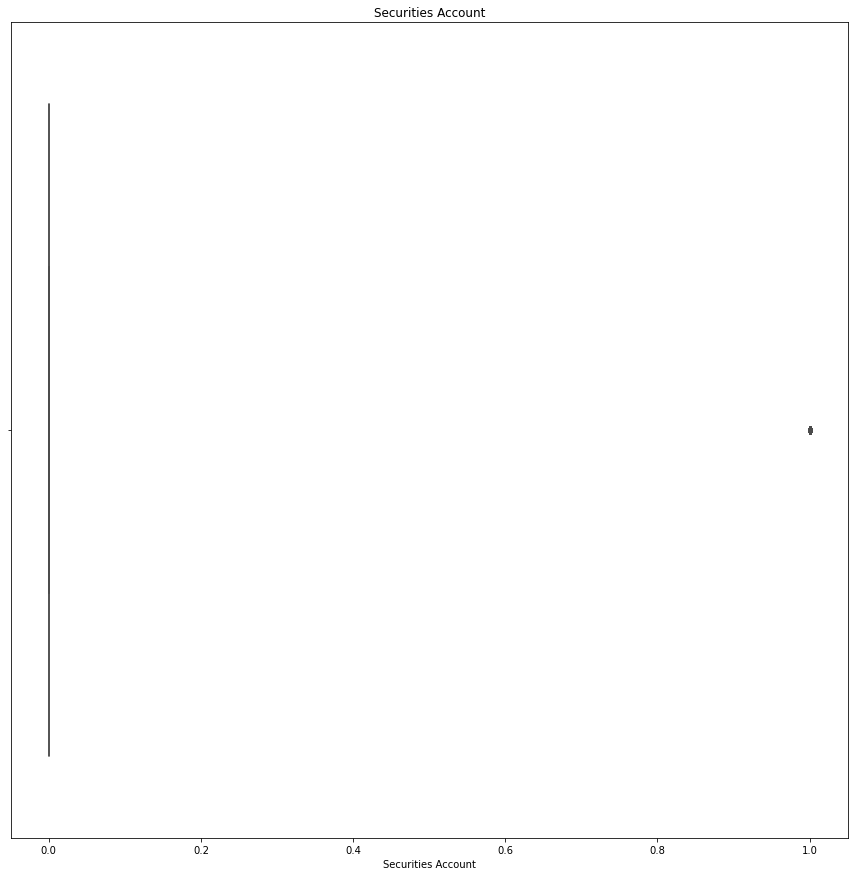

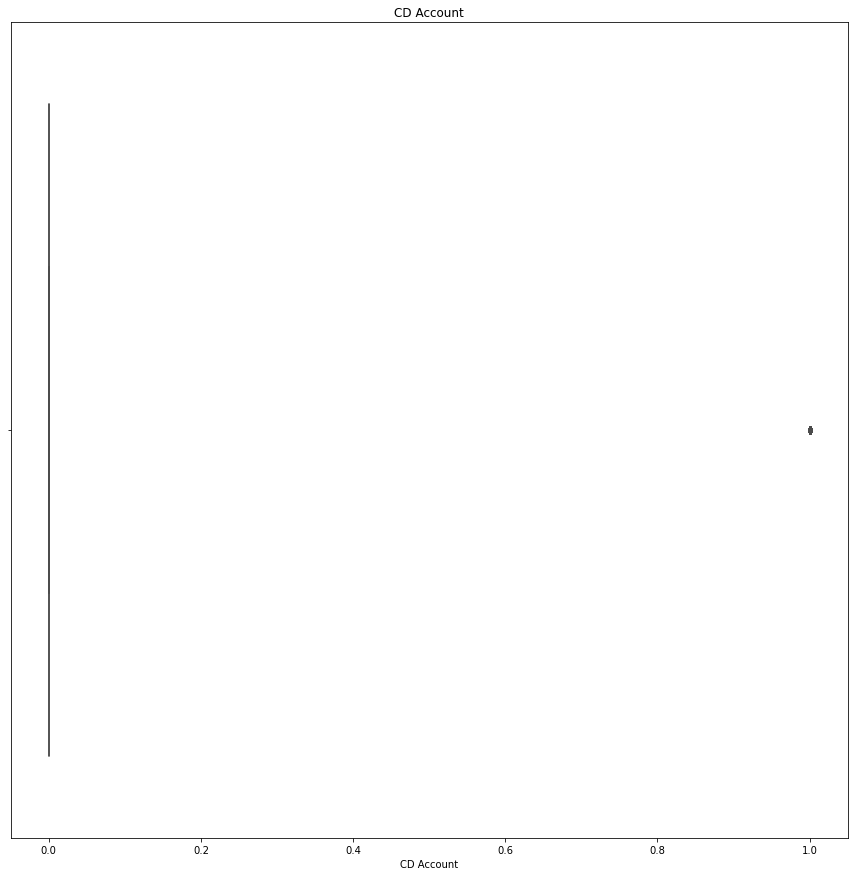

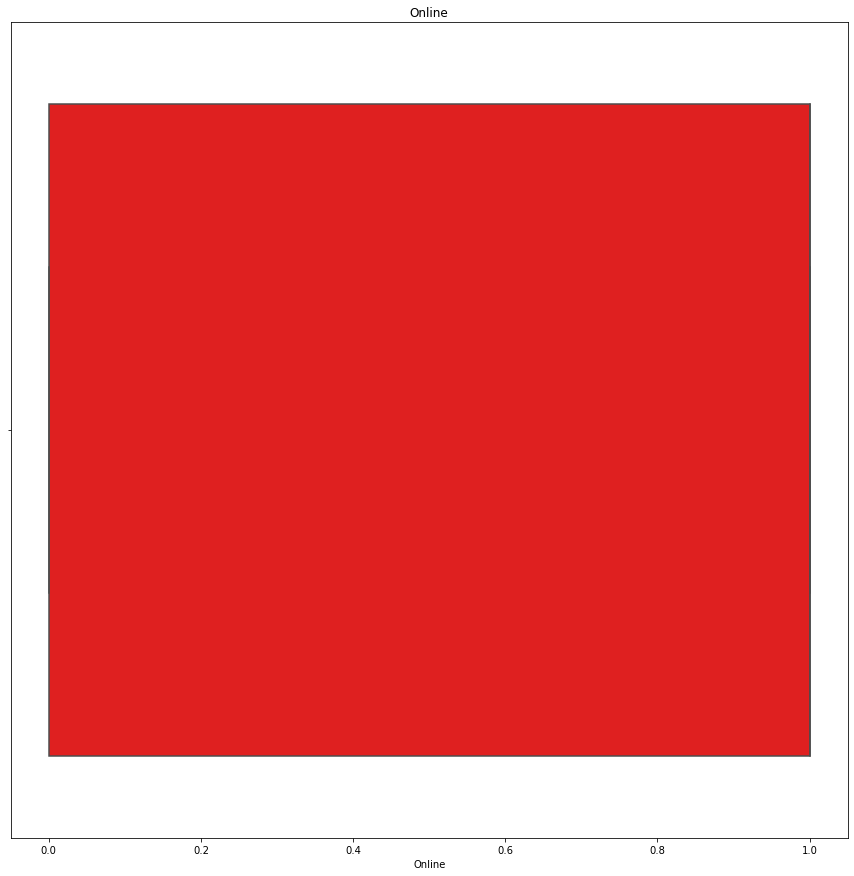

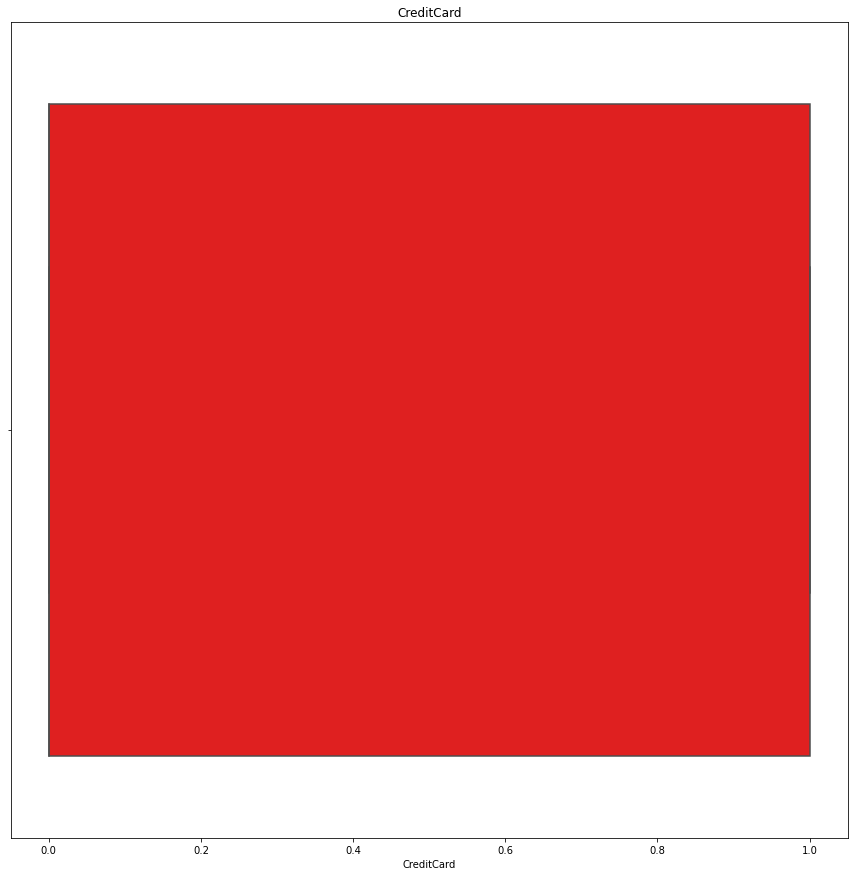

<Figure size 1080x1080 with 0 Axes>

In [44]:
# Plotting Box Plots for various columns to understand the outliers
for feature in Bank_Data:
    sns.boxplot(Bank_Data[feature],color='red')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    
    # The Median Experiance is 20 years
    # The income seems to have some outliers 
    #The CC avg also seems to have some outliers

In [47]:
#Removing the outliers for the Income Parameter
for x in ['Income','Mortgage','CCAvg']:
    q75,q25 = np.percentile(Bank_Data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Bank_Data.loc[Bank_Data[x] < min,x] = np.nan
    Bank_Data.loc[Bank_Data[x] > max,x] = np.nan
    
    #Taking care of the outliers in Income, Mortage and CC Average Variables

In [54]:
# Checking the values for the outliers 
Bank_Data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [52]:
#Dropping the Null Values
Bank_Data = Bank_Data.dropna(axis = 0)

In [53]:
# Checking the Sum to verify that Outliers have reduced
Bank_Data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

D:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


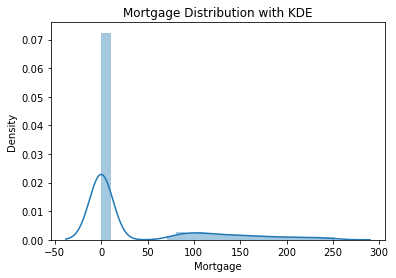

In [58]:
#The graph below shows that the values are centered around zero
sns.distplot(Bank_Data['Mortgage'])
plt.title('Mortgage Distribution with KDE');

In [13]:
#When we check the skew we find that the Bank Data has a slight Left Skew

Bank_Data['Mortgage'].skew()

2.1040023191079444

<h1> Scatter Plot </h1>

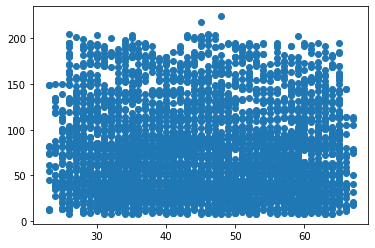

In [66]:
#Plotting scatter Plot between Age of the customer and the Income 
plt.scatter(Bank_Data.Age, Bank_Data.Income)
#The graph below does not give very conclusive results 

In [73]:
# checking the -ve values
Removing_Negative_Experience = Bank_Data.Experience < 0
Removing_Negative_Experience.value_counts()
# 

False    4948
True       52
Name: Experience, dtype: int64

In [74]:
#Checking the distribution of the data for negative values in the Experience Column 
Bank_Data[Bank_Data['Experience'] < 0]['Experience'].value_counts()
# The -ve experiences may cause some biases in the analysis.

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

<h1> Count Plot </h1>

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


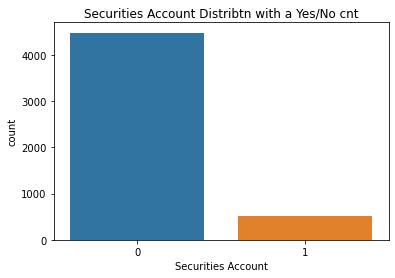

In [99]:
# Plotting the Securities Account with the Count
sns.countplot(Bank_Data['Securities Account'])
plt.title('Securities Account Distribtn with a Yes/No cnt');

#The graph shows that a lot of people don't hold the securities account

<h1> Bar Plot for understanding relation between credit card and income</h1>

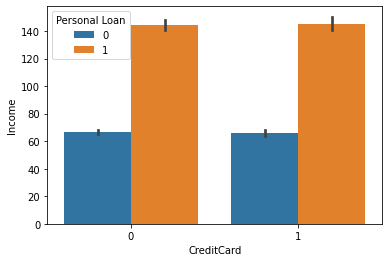

In [86]:
# Reading the Bar plot for credit card and Income
sns.barplot(x='CreditCard',y='Income', data=Bank_Data, 
            hue='Personal Loan')
  
plt.show()

<h1> Correlation amongst Variables </h1>

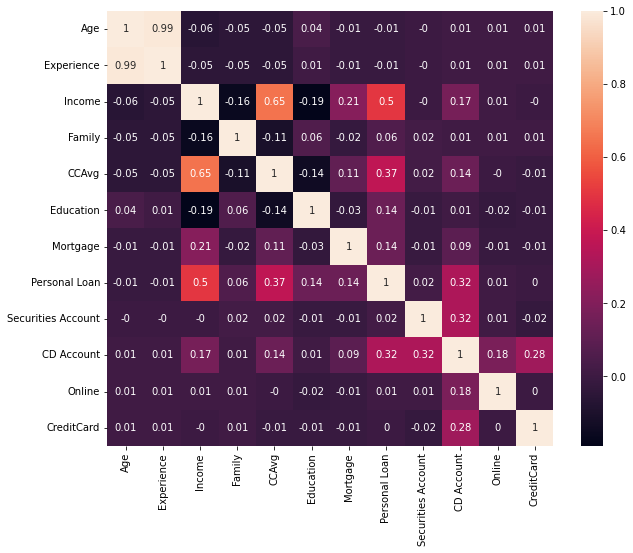

In [92]:
#Plotting a correlation Map 
plt.figure(figsize=[10,8])
matrix = Bank_Data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
#There is a very strong correlation between Age and Experience
#CC Avg and income have a moderate correlation to the tune of 0.65
#Personal Loan is our target variable here 

<Figure size 720x360 with 0 Axes>

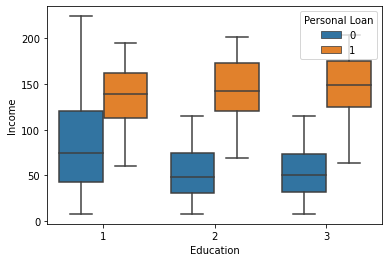

<Figure size 720x360 with 0 Axes>

In [95]:
# Creating a box plot with Education and Income as the main parameters
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=Bank_Data);
plt.figure(figsize=(10,5))

# Customers with graduate degrees have a  higher propensity for taking the loan.

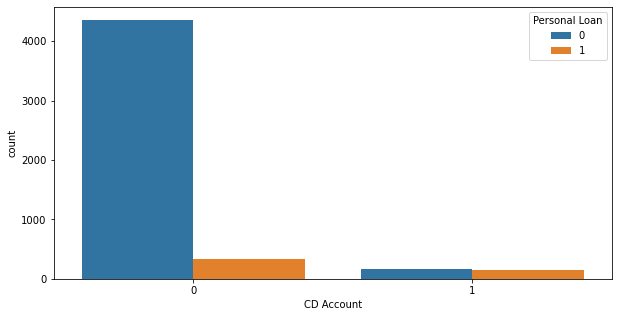

In [20]:
#Count Plot between CD Account and Personal Loan
plt.figure(figsize=(10,5))
sns.countplot(x='CD Account', data=Bank_Data, hue='Personal Loan');
#Customers who have a CD account have also taken Personal Loan
#Customers who have not taken CD account do not gravitate towards PL, in majority do not opt for PL

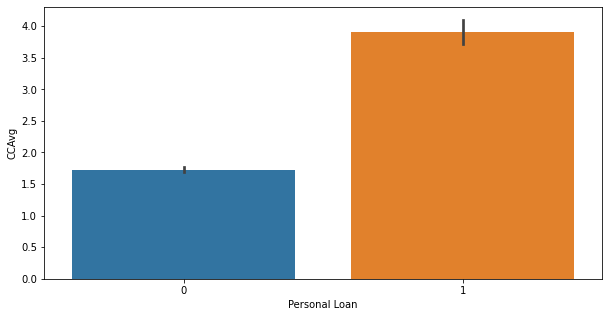

In [21]:
#Count Plot with Personal Loan and Cash Credit Account
plt.figure(figsize=(10,5))
sns.barplot(x='Personal Loan', y='CCAvg', data=Bank_Data);
#People who had taken Short term working capital  were also more susceptible to taking Personal Loans

In [103]:
#Declaring the value of X and Y for training and testing the Model 
y = Bank_Data[['Personal Loan']]  #Predictor Parameter
x=Bank_Data.drop('Personal Loan',axis=1) # Target Column

In [104]:
# Using the sklearn function to import test and train split, using 80% to train and 20% to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)
x_train.shape, x_test.shape

((4000, 11), (1000, 11))

In [129]:
#Summary of Logistic Regression Model 
import statsmodels.api as smf
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(y_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())
# Logitic regression uses statsmodels.api 
# From the table generated below we see that Education, CC Avg,and CD Account are three importamt variables for this study
# Credit card seems to have a negative effect on personal loans .

Optimization terminated successfully.
         Current function value: 0.130292
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3988
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.5923
Time:                        06:57:28   Log-Likelihood:                -521.17
converged:                       True   LL-Null:                       -1278.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.3145      1.806     -6.266      0.000     -14.854      -7.775
Age  

D:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h1> Fitting Logistic Regression Model</h1>

In [128]:
# Importing further Libraries and fitting the data.
from sklearn import metrics
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#Fitting the data 
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression model : {:.2f}'.format(logreg.score(x_test, y_test)))


Accuracy of logistic regression model : 0.95


D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1> Confusion Matrix </h1>

In [124]:
#Printing the confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[902   8]
 [ 37  53]]


D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


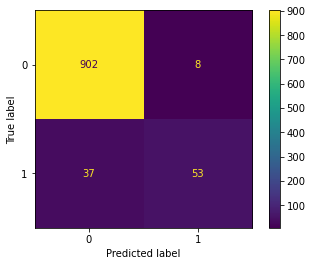

In [125]:
#Importing confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,y_train)
plot_confusion_matrix(logistic_regression, x_test, y_test)  
plt.show()

In [126]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8688524590163934
Recall: 0.5888888888888889


In [127]:
#The Precision of the model comes out to be 86%

In [ ]:
#The Recall comes out to be 58%

In [ ]:
# GeeksforGeeks. (2022a, August 23). Logistic Regression using Statsmodels. Retrieved October 8, 2022, from https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

In [ ]:
#Conclusion
#The target parameter- Personal Loan has good correlation with Income, CC Avg, Education, Mortgage and CD Account
